<h1><center>Calculating the axion relic density from the EOM</center></h1>

In [6]:
import matplotlib
import matplotlib.patheffects as pe
from scipy.integrate import odeint

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rc('font', size=16)

main_line_color = "#e96859"
main_line_color2 = "#9546ca"
main_line_color3 = "#00cc00"

path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal(), 
              pe.SimpleLineShadow(alpha = 0.1, offset=(2,-2))]

## Rewritting our ODE

Given that $\phi=f_a\theta$, where $f_a$ is the scale of PQ symmetry breaking, we can write the EOM for our axion in an expanding universe as

\begin{equation}
    \frac{d^2\theta}{dt^2} + 3H(T)\frac{d\theta}{dt} + \frac{1}{f_a^2}\frac{\partial V(\theta)}{\partial\theta} = 0.
\end{equation}

However, this equation is currently in terms of time derivatives which isn't very convienient since we don't have an equation for $T = T(t)$. We can however, calculate $\frac{dt}{dT}$ and hence rewrite our eom in terms of temperature derivatives.

The expansion is governed by the Friedmann equations

\begin{equation}
   H^2 = \frac{8\pi}{3M_{pl}^2}\rho
\end{equation}

\begin{equation}
    \frac{d\rho}{dt}  = -3H(T)(\rho + p) = -3HsT
\end{equation}

where $\rho$, $p$ and $s$ are the energy density, pressure and entropy density of the early universe and $M_{pl}$ is the Planck mass (<i>Note: g_s(T) is just what we called g_*(T) in last lab sheet</i>). At the temperatures where axion production happens, the contribution of axions to these densities can be neglected.

Therefore, $\rho$ and $s$ can be expressed as

\begin{equation}
    \rho = \frac{\pi^2}{30}g_{\rho}T^4
\end{equation}

\begin{equation}
    s = \frac{2\pi^2}{45}g_{s}T^3
\end{equation}

where $g_{\rho}$ and $g_{s}$ are the effective degrees of freedom for the energy density  and for the entropy density respectively.

We can hence show that

\begin{equation}
    \frac{dt}{dT} = -M_{pl}\sqrt{\frac{45}{64\pi^3}}\frac{1}{T^3g_s(T)\sqrt{g_{\rho}(T)}}\Big( T \frac{dg_{\rho}(T)}{dT} + 4g_{\rho}(T) \Big)
\end{equation}

and therefore

\begin{equation}
    \frac{d^2\theta}{dT^2} + \Big[3H(T)\frac{dt}{dT} - \frac{d^2 t}{d T^2}/\frac{dt}{dT} \Big]\frac{d \theta}{d T} + \frac{1}{f_a^2}\Big(\frac{dt}{dT}\Big)^{2}\frac{\partial V(\theta)}{\partial \theta} = 0
\end{equation}


In [3]:
import numpy as np

# Constants
M_pl = 1.22e19 # Plank mass (GeV)
hbar = 6.58e-25 # GeV s
c = 3e8 # m / s

T0 = 2.35e-13 # GeV
s_today = 2*np.pi**2/45*43/11*T0**3
rho_crit = 8.01e-47 # h^{-2} GeV

litte_h = 0.7

In [4]:
from scipy.interpolate import interp1d

# Lattice QCD data
Tr_data = np.array([0.0, 0.50, 1.00, 1.25, 1.60, 2.00, 2.15, 2.2, 2.4, 2.5, 3.0 ,4.0, 4.3, 4.6,5,5.45])
gr_data = np.array([10.71,10.74,10.76,11.09,13.68,17.61,24.07,29.84,47.83,53.04,73.48,83.10,85.86,91.97,102.17,104.98])
conv = np.array([1.00228,1.00029,1.00048,1.00505,1.02159,1.02324,1.05423,1.07575,1.06118,1.04690,1.01778,1.00123,1.00389,1.00887,1.00750,1.00023])
gs_data = gr_data/conv

# Calculate dt/dT
T = 10**Tr_data*1e-3 # GeV

const = -M_pl*np.sqrt(45/(64*np.pi**3))
A = 1/(T**3*gs_data*gr_data**(1/2))
B = (T*np.gradient(gr_data, T) + 4*gr_data)
dtdT_data = const * A * B 

# Make splines
gr_int = interp1d(Tr_data-3, gr_data, kind = 'cubic')
dtdT_int = interp1d(Tr_data-3, np.log10(abs(dtdT_data)), kind = 'cubic')
gs_int = interp1d(Tr_data-3, gs_data, kind = 'cubic')

def g_s(T):
    '''Takes temperature in GeV and returns effective degrees of freedom for entropy'''
    return gs_int(np.log10(T))

def g_rho(T):
    '''Takes temperature in GeV and returns effective degrees of freedom for energy'''
    return gr_int(np.log10(T))

def dtdT(T):
    '''Takes temperature in GeV and returns derivative of time wrt temperature in GeV^{-2}'''
    return -10**dtdT_int(np.log10(T))

# Calculate and spline 
T2 = np.logspace(np.log10(max(T)), np.log10(min(T)), int(1e4))
d2tdT2_data = np.gradient(dtdT(T2), T2) 
dt2dT2_int = interp1d(np.log10(T2), np.log10(d2tdT2_data), kind = 'cubic')

def d2tdT2(T):
    '''Takes temperature in GeV and returns second derivative of time wrt temperature 
    in GeV^{-3}'''
    return 10**dt2dT2_int(np.log10(T))


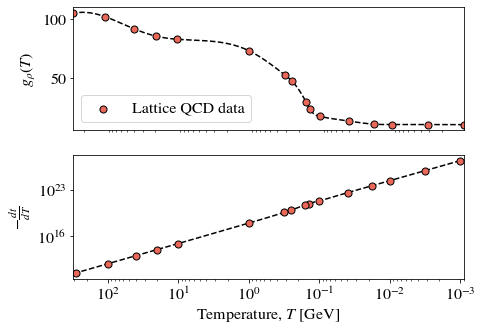

In [7]:
import matplotlib.pyplot as plt
# Plot the splines

fig = plt.figure(figsize = (7, 5))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# dummy T
T2 = np.logspace(-3, 2.45, 1000)

# Plot g_rho(T)
ax1.scatter(T, gr_data,  marker = "o", s = 50, edgecolors="k", lw = 1, 
            color = main_line_color, zorder=2, label = "Lattice QCD data")
#ax1.semilogx(T, gr_data, 'o')
ax1.semilogx(T2, g_rho(T2), 'k--', zorder=1)
ax1.set_xlim(T2[-1], T2[0])
ax1.set_xticks([])
ax1.set_ylabel(r"$g_{\rho}(T)$")
ax1.legend(loc=3)


ax2.scatter(T, -dtdT_data,  marker = "o", s = 50, edgecolors="k", lw = 1, color = main_line_color, zorder=2)
ax2.loglog(T2, -dtdT(T2), "k--", zorder=1)
ax2.set_xlabel("Temperature, $T$ [GeV]")
ax2.set_xlim(T2[-1]*1.1, T2[0]*0.9)
#ax2.set_xticks([])
ax2.set_ylabel(r"$-\frac{dt}{dT}$")

plt.savefig("timeTemp.pdf", bbox_inches = "tight")

plt.show()

In [5]:
# Functions for density, Hubble parameter and Entropy

def rhoFunc(T):
    '''Takes temperature in GeV and returns radiation density in GeV^4'''
    rho = np.pi**2/30*g_rho(T)*T**4
    return rho 

def HFunc(T):
    '''Takes temperature in GeV and returns Hubble parameter H in
    GeV^2'''
    H = np.sqrt(8*np.pi/(3*M_pl**2)*rhoFunc(T))
    return H

def entropy(T):
    '''Takes temperature in GeV and returns entropy in GeV'''
    return 2*np.pi**2/45*g_s(T)*T**3

The temperature dependence of the axion mass arises due to the susceptibility of the topological charge $\chi(T)$ via the equation

\begin{equation}
    m_a^2 = \frac{\chi(T)}{f_a^2}.
\end{equation}

Like with $g_s$ and $g_{\rho}$, it's temperature dependent value is determined via lattice QCD.

We use values from from <a href="https://arxiv.org/abs/1606.07494">Lattice QCD for Cosmology</a>. 


#### Tasks 
<ul> <li> Write down the new ODE for the temperature dependent axion mass
    </li>
    <li> Use this the write a new ODE solver and hence calculate $\theta$ and a function of temperature for $f_a = 10^{12}$ GeV (Note: $T_{osc}$ is now different).
    </li>
    <li> Recalculate $\rho_a$, $n/s$ and hence $\Omega_a$.
    </li>
</ul>

For this scale ($f_a = 10^{12}$ GeV) the zero-temperature mass $m_a(T=0) = 4 \times 10^{-15}$ GeV. However, you should notice that the relic density is different. Why do you think this is?

</br></br>

<i>
Hint 1: Your solver will now require $f_a$ as an input instead of the mass.

Hint 2: Be careful with the units for $\chi(T)$. These should be consistent with all other units in the problem.
</i>

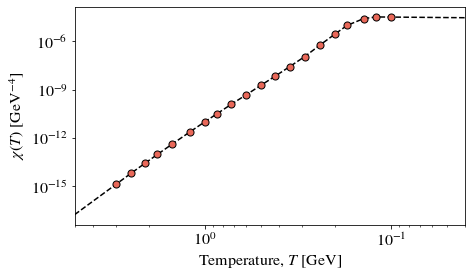

In [8]:
T_top = np.array([100,120,140,172,200,240,290,350,420,500,600,720,
                  860,1000,1200,1500,1800,2100,2500,3000])
chi_log = np.array([-1.665,-1.657,-1.759,-2.185,-2.726,-3.396,-4.116,
                    -4.746,-5.347,-5.908,-6.499,-7.0811,-7.6713,-8.1715,
                    -8.7917,-9.5620,-10.2023,-10.7526,-11.3828,-12.0533])

chiFunc1 = interp1d(np.log10(T_top*1e-3),chi_log,
                    bounds_error = False, fill_value="extrapolate")

plt.figure(figsize = (7,4))
def chiFunc(T):
    chi_log = chiFunc1(np.log10(T))
    chi_fm = 10**chi_log
    chi_GeV = chi_fm * (hbar * c / (1e-15))**4
    return chi_GeV

plt.scatter(T_top*1e-3, 10**chi_log*(hbar * c / (1e-15))**4,  marker = "o", s = 50, edgecolors="k", lw = 1, 
            color = main_line_color, zorder=2, label = "Lattice QCD data")
Tspline = np.logspace(0.7, -1.4, 100)
plt.loglog(Tspline, chiFunc(Tspline), 'k--', zorder = 1)
plt.xlim(max(Tspline), min(Tspline))
plt.ylabel("$\chi(T)$ [GeV$^{-4}$]");
plt.xlabel("Temperature, $T$ [GeV]")

# y = 10**chi_log*(hbar * c / (1e-15))**4
# x = T_top*1e-3
# p1 = np.polyfit(np.log10(x[x>1]), np.log10(y[x>1]), deg=1)
# plt.loglog(x, 10**(p1[0]*np.log10(x) + p1[1]))
# print(p1)

# y = 10**chi_log*(hbar * c / (1e-15))**4
# x = T_top*1e-3
# p1 = np.polyfit(np.log10(x[(x<0.8) * (x>0.2)]), np.log10(y[(x<0.8) * (x>0.2)]), deg=1)
# plt.loglog(x, 10**(p1[0]*np.log10(x) + p1[1]))
# print(p1)

plt.savefig("suscept.pdf", bbox_inches = "tight")

In [7]:
# Define our new temperature dependent ODE

def ode_smallTheta(y, T, f_a):
    """Temperature dependent axion EOM"""
    theta, omega = y

    mass = np.sqrt(chiFunc(T))/f_a
    A = d2tdT2(T)/dtdT(T)
    B = - 3*HFunc(T)*dtdT(T)
    C = - dtdT(T)**(2)*mass**2*theta
    
    d_omega = (A + B)*omega + C
    derivs = [omega, d_omega]
    
    return derivs

theta_i = 1
f_a = 3e10 #GeV

y0 = [theta_i, 0]
T2 = np.logspace(1, -0.5, int(1e5))

soln2 = odeint(ode_smallTheta, y0, T2, args = (f_a,))

theta2 = soln2[:,0]
dtheta_dT2 = soln2[:,1]
axion_density2 = 0.5*f_a**2*(dtheta_dT2 / dtdT(T2))**2 + 1/2*chiFunc(T2)*theta2**2
mass2 = chiFunc(T2)/f_a
number_density2 = axion_density2/mass2

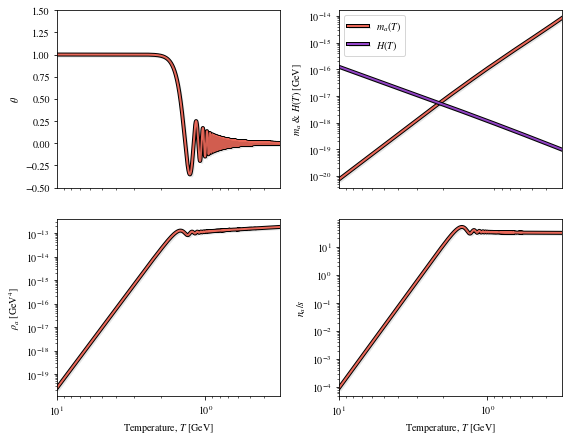

In [8]:
mass2 = np.sqrt(chiFunc(T2))/f_a

number_density2 = axion_density2/mass2

fig = plt.figure(figsize = (8,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.semilogx(T2, soln2[:,0], '-', lw = 2, color = main_line_color, path_effects = path_effects)
ax1.set_ylim(-0.5, 1.5)
ax1.set_ylabel(r"$\theta$")

ax2.loglog(T2, mass2, '-', lw = 2, label = "$m_a(T)$", color = main_line_color, path_effects = path_effects)
ax2.loglog(T2, HFunc(T2), '-', lw = 2, label = "$H(T)$", color = main_line_color2, path_effects = path_effects)
ax2.set_ylabel(r"$m_a$ & $H(T)$ [GeV]")
ax2.legend(loc=2)

ax3.loglog(T2, axion_density2, '-', lw = 2, color = main_line_color, path_effects = path_effects)
ax3.set_ylabel(r"$\rho_a$ [GeV$^4$]")

ax4.loglog(T2, number_density2/entropy(T2), lw = 2, color = main_line_color, path_effects = path_effects)
ax4.set_ylabel("$n_a/s$")

plt.tight_layout()

for ax in [ax1, ax2]:
    ax.set_xticks([])
    ax.set_xticklabels([])
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlim(max(T2),min(T2))
for ax in [ax3, ax4]:
    ax.set_xlabel("Temperature, $T$ [GeV]")
    
plt.savefig("axionODEex.pdf", bbox_inches = "tight")


## Finding relic density

We can now repeat this process over a range of values of $f_a$ and $\theta_i$

In [9]:
from scipy.optimize import root

def solve(T, f_a):
    return 3*HFunc(T) - np.sqrt(chiFunc(T))/f_a

def FindTosc(f_a):
    return root(solve, 1, args = (f_a,)).x[0]

def SolveTheta(ode, f_a, theta_i, steps):
    '''Takes decay constant and initial misalignment angle and returns the evolved axion
    field for some given ode and number of steps'''
    T_osc = FindTosc(f_a)
    if theta_i<1:
        T = np.logspace(np.log10(T_osc*2), np.log10(T_osc/3), int(steps))
    else:
        T = np.logspace(np.log10(T_osc), np.log10(T_osc/6), int(steps))
    y0 = [theta_i, 0]

    soln = odeint(ode, y0, T, args = (f_a,))
    return soln, T

def FindOmega(soln, T, potential, f_a):
    '''Takes solution from Solve Theta and returns relic density in units h^2'''
    theta = soln[:,0]
    dtheta_dT = soln[:,1]

    axion_density = 0.5*f_a**2*(dtheta_dT / dtdT(T))**2 + potential(T, theta)
    
    mass = np.sqrt(chiFunc(T))/f_a
    
    number_density = axion_density/mass
    number_density_today = number_density[-1]/entropy(T[-1])*s_today
    
    mass_today = np.sqrt(chiFunc(1e-11))/f_a
    
    Omega = number_density_today*mass_today/rho_crit*litte_h**4
    return Omega

def potential1(T, theta):
    return 0.5*chiFunc(T)*theta**2

def ode_largeTheta(y, T, f_a):
    """Temperature dependent axion EOM with full harmonic potential"""
    theta, omega = y

    mass = np.sqrt(chiFunc(T))/f_a
    A = d2tdT2(T)/dtdT(T)
    B = - 3*HFunc(T)*dtdT(T)
    C = - dtdT(T)**(2)*mass**2*np.sin(theta)
    
    d_omega = (A + B)*omega + C
    derivs = [omega, d_omega]
    
    return derivs

def potential2(T, theta):
    return 0.5*chiFunc(T)*(1-np.cos(theta))

In [52]:
f_as = np.logspace(10, 20, 20)
theta_is = np.logspace(-4, np.log10(3), 20)

Omega = np.zeros((len(f_as), len(theta_is)))

print("|", end = "")
for i, f_a in enumerate(f_as):
    for j, theta_i in enumerate(theta_is):
        soln, T = SolveTheta(ode_smallTheta, f_a, theta_i, 1e4)
        Omega[i,j] = FindOmega(soln, T, potential1, f_a)         
    # check progress
    print("#", end = "")
print("|")
plt.show()

|

KeyboardInterrupt: 

### Save/load

In [31]:
#M = [f_as, theta_is, Omega.reshape(len(f_as)**2)]
#np.save("axionRelicData.npy", M, allow_pickle = True)

f_as, theta_is, Omega = np.load("axionRelicData.npy", allow_pickle = True)
Omega = Omega.reshape(len(f_as), len(f_as))

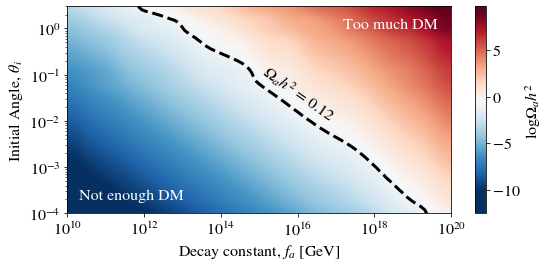

In [51]:
plt.figure(figsize = (8,4))

import scipy.ndimage

# Resample your data grid by a factor of 3 using cubic spline interpolation.
Omega2 = 10**scipy.ndimage.zoom(np.log10(Omega), 3)
fa2 = np.logspace(np.log10(min(f_as)), np.log10(max(f_as)), 60)
theta2 = np.logspace(np.log10(min(theta_is)), np.log10(max(theta_is)), 60)

for i in range(3):
    CS = plt.contourf(fa2, theta2,  np.log10(Omega2.T), cmap = "RdBu_r", 
                      vmin = -10, vmax = 9, levels = 500)
cbar = plt.colorbar(ticks=np.linspace(-10,10, 5))
cbar.set_label('$\log{\Omega_{a}h^2}$')
plt.contour(CS, levels=[np.log10(0.12)], colors='k', linewidths = 3, linestyles = '--')

plt.xscale("log")
plt.yscale("log")

plt.ylabel(r"Initial Angle, $\theta_i$");
plt.xlabel(r"Decay constant, $f_a$ [GeV]");

plt.annotate("$\Omega_{a}h^2$ = 0.12", (1e15, 1e-2),rotation = -35, color = "k");
plt.annotate("Not enough DM", (2e10, 2e-4), color = "white")
plt.annotate("Too much DM", (1.5e17, 1e0), color = "white")

plt.tight_layout()

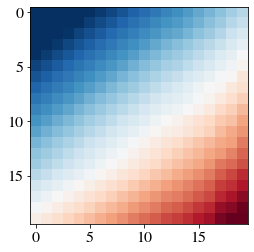

In [39]:
plt.imshow(np.log10(Omega), cmap = "RdBu_r", vmin = -10, vmax = 9)

## Compare to Approximate Solution

We can also derive the following approximate equation for the axion relic density (see <a href="https://arxiv.org/abs/1610.01639">Ballesteros et. al</a> for details).

\begin{equation}
    \Omega_a h^2 \approx 0.35 \Big(\frac{\theta_i}{10^{-3}} \Big)^2 \times \begin{cases}
    \Big(\frac{f_a}{3\times10^{17}\mathrm{GeV}}\Big)^{1.17} (f_a \lesssim 3\times10^{17}\mathrm{GeV}),\\
    \Big(\frac{f_a}{3\times10^{17}\mathrm{GeV}}\Big)^{1.54} (f_a \gtrsim 3\times10^{17}\mathrm{GeV}),
    \end{cases} 
\end{equation}

In [ ]:
# Calculate Theoretical values
theta_is = np.logspace(-4, np.log10(np.pi),1000)

f_as = np.logspace(10, 20, 1000) #GeV

ThetaT, FaT = np.meshgrid(theta_is, f_as)

Omega3 = np.zeros(ThetaT.shape)
Omega3[FaT<3e17] = 0.35*(ThetaT[FaT<3e17]/0.001)**2*(FaT[FaT<3e17]/3e17)**1.17
Omega3[FaT>3e17] = 0.35*(ThetaT[FaT>3e17]/0.001)**2*(FaT[FaT>3e17]/3e17)**1.54

CS = plt.contourf(f_as, theta_is,  np.log10(Omega3.T))
cbar = plt.colorbar()
cbar.set_label('$\log{\Omega_{a}h^2}$')
plt.contour(CS, levels=[np.log10(0.12)], colors='k', linewidths = 3, linestyles = '--')
plt.xscale("log")
plt.yscale("log")

plt.ylabel(r"Initial Angle, $\theta_i$");
plt.xlabel(r"Decay constant, $f_a$ [GeV]");

In [ ]:
plt.imshow(np.log10(Omega))

In [43]:
Omega2 = scipy.ndimage.zoom(Omega, 3)


In [44]:
Omega2.shape

(60, 60)

In [46]:
Omega.shape

(20, 20)